The dataset is from Kaggle and contains Data Science job salaries.The table is structured as follow:
 
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
    - *EN*: Entry-level / Junior
    - *MI*: Mid-level / Intermediate
    - *SE*: Senior-level / Expert
    - *EX*: Executive-level / Director
- **employment_type**: The type of employement for the role:
    - *PT*: Part-time
    - *FT*: Full-time
    - *CT*: Contract
    - *FL*: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salaryinusd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
    - *0*: No remote work (less than 20%)
    - *50*: Partially remote
    - *100*: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
    - *S*: less than 50 employees (small)
    - *M*: 50 to 250 employees (medium)
    - *L*: more than 250 employees (large)

In [379]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import country_converter as coco #code for country converter instalation in anaconda:  conda install country_converter 
                                 #(ATTENTION:this code requires some time in order to run)
import plotly.express as px #code for plotly: conda install -c plotly plotly 
import pycountry_convert as pc #country to continent converter code: pip install pycountry-convert 
from pandas.plotting import table

from matplotlib import rcParams
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,10)
sns.set_style("whitegrid")




df=pd.read_csv(r'C:\Users\anest\OneDrive\Υπολογιστής\salaries.csv')

In [380]:
#display the first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [381]:
#number of rows and columns in the dataframe
df.shape

(1332, 11)

There are 1332 employee salaries in the dataset.

In [382]:
#dataframe columns
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [383]:
#description of the data
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [384]:
#dataframe data types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### DATA CLEANING

In [385]:
# Check missing values for each column
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There aren't any null values in the dataset.

In [386]:
#check for duplicates (True value indicates if there are any duplicates)
df.duplicated().value_counts()

False    1069
True      263
dtype: int64

As we observe above there are 263 duplicated values. 

In [387]:
#display some of the duplicated values
duplicate = df[df.duplicated()]
duplicate.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
69,2022,SE,FT,Data Engineer,130000,USD,130000,US,0,US,M
76,2022,SE,FT,Data Engineer,170000,USD,170000,US,0,US,M
77,2022,SE,FT,Data Engineer,150000,USD,150000,US,0,US,M
83,2022,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M
108,2022,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M
109,2022,SE,FT,Data Engineer,110000,USD,110000,US,0,US,M
116,2022,SE,FT,Data Engineer,170000,USD,170000,US,0,US,M
117,2022,SE,FT,Data Engineer,130000,USD,130000,US,0,US,M
118,2022,SE,FT,Data Analyst,150000,USD,150000,US,0,US,M
119,2022,SE,FT,Data Analyst,95000,USD,95000,US,0,US,M


The above dataset instance, indicates that a lot of salaries, share the same values. Which might be normal, considering the fact that some employees might be compensated with the same salary. We can't evaluate properly, if they are duplicated values, since the dataset is not detailed enough. For this reason, i chose to keep the data as is.

### DATA MODIFICATION

In [388]:
#display the unique values of the experience level column
df['experience_level'].unique()

array(['MI', 'SE', 'EX', 'EN'], dtype=object)

In [389]:
df['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [390]:
df['remote_ratio'].unique()

array([  0, 100,  50], dtype=int64)

In [391]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [392]:
#modification function
def exp_level(x):
    if x=='EN':
        return 'Entry-level'
    elif x=='MI':
        return 'Mid-level'
    elif x=='SE':
        return 'Senior-level'
    else:
        return 'Executive-level'

In [393]:
def emp_type(x):
    if x=='FT':
        return 'Full-time'
    elif x=='PT':
        return 'Part-time'
    elif x=='CT':
        return 'Contract'
    else:
        return 'Freelance'

In [394]:
def remote_r(x):
    if x==0:
        return 'On site'
    elif x==50:
        return 'Hybrid'
    else:
        return 'Remote'

In [395]:
def comp_size(x):
    if x=='M':
        return 'Medium'
    elif x=='L':
        return 'Large'
    else:
        return 'Small'

In [396]:
#apply the function to the dataset
df['experience_level_text']=df['experience_level'].apply(exp_level)

In [397]:
df['employment_type_text']=df['employment_type'].apply(emp_type)

In [398]:
df['remote_ratio_text']=df['remote_ratio'].apply(remote_r)

In [399]:
df['company_size_text']=df['company_size'].apply(comp_size)

In [400]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M,Mid-level,Full-time,On site,Medium
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M,Mid-level,Full-time,On site,Medium


### DATA EXPLORATION

#### What is the distribution of work year?

In [401]:
#print number of values for every year
woye=df['work_year'].value_counts().rename_axis('Work year').reset_index(name='Counts')
woye

,Work year,Counts
0,2022,1029
1,2021,228
2,2020,75


The year 2022 is the year with the most data, followed by 2021 and 2020.

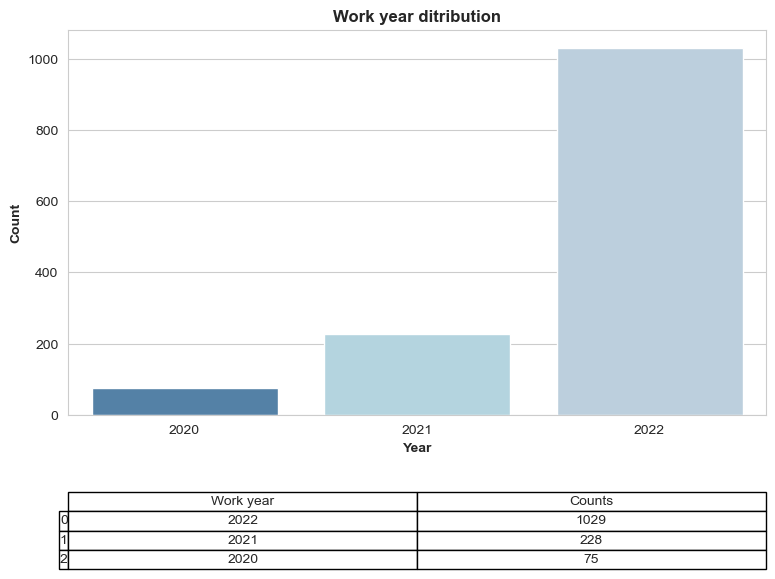

In [402]:
#visualization
fig, ax = plt.subplots(figsize=(9,5))
colors=['#4682B4', 'lightblue', '#B6D0E2']
ax=sns.countplot(x ='work_year', data = df,palette = colors)
plt.title("Work year ditribution",fontweight='bold')
plt.xlabel('Year',fontsize=10,fontweight='bold')
plt.ylabel('Count',fontsize=10,fontweight='bold')
table(ax, data=woye, rowLabels=woye['Work year'], colLabels=woye['Counts'],bbox=[0, -0.4, 1, 0.2],cellLoc='center')
plt.show()

#### What is the distribution of employee residence?

In [403]:
df['employee_residence'].value_counts().rename_axis('Employee residence').reset_index(name='Counts').head()

,Employee residence,Counts
0,US,910
1,GB,83
2,IN,45
3,CA,38
4,DE,31


Most people, in the dataset, are US residents.

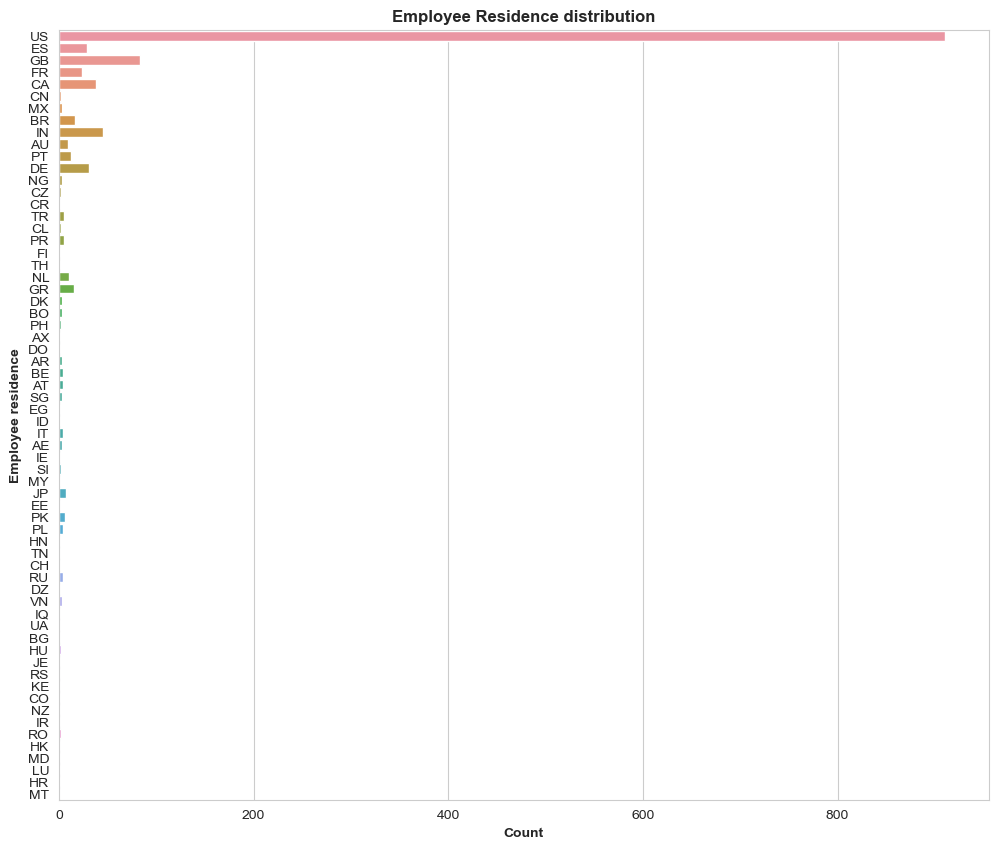

In [404]:
sns.countplot(y='employee_residence', data = df)
plt.title("Employee Residence distribution",fontweight='bold')
plt.ylabel('Employee residence',fontsize=10,fontweight='bold')
plt.xlabel('Count',fontsize=10,fontweight='bold')
plt.show()

#### What is the distribution of company size?

In [405]:
company_counts=df['company_size_text'].value_counts().rename_axis('Company size').reset_index(name='Counts')
company_counts

,Company size,Counts
0,Medium,898
1,Large,322
2,Small,112


There are 898 employees working for medium sized companies. Large companies employ 322 and only 112 work in small companies.

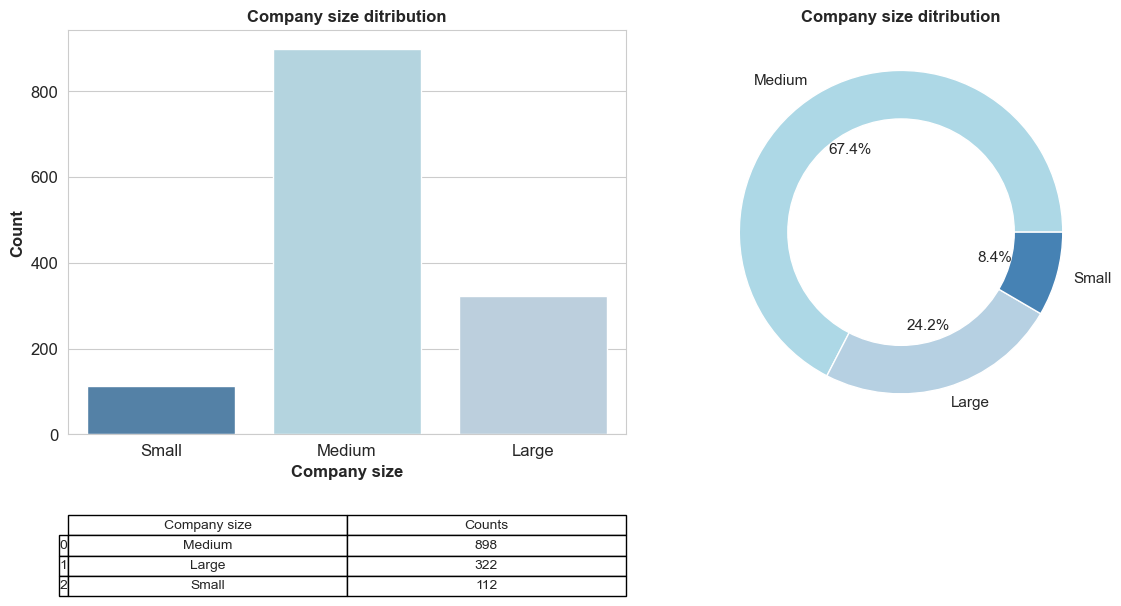

In [406]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(5)
colors=['#4682B4', 'lightblue', '#B6D0E2']
ax=sns.countplot(x ='company_size_text', data = df,order=['Small','Medium','Large'],palette = colors)
plt.title("Company size ditribution",fontweight='bold')
plt.xlabel('Company size',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=12)

plt.subplot(1, 2, 2)
palette_color = ['lightblue','#B6D0E2','#4682B4']
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(company_counts['Counts'], labels=company_counts['Company size'],textprops={"fontsize":11}, autopct='%1.1f%%',
        colors=palette_color) 
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Company size ditribution",fontweight='bold')
plt.tight_layout()
table(ax, data=company_counts, rowLabels=company_counts['Company size'], colLabels=company_counts['Counts'],bbox=[0, -0.4, 1, 0.2],cellLoc='center')


plt.show()

#### What is the distribution of remote ratio?

In [407]:
remote_counts=df['remote_ratio_text'].value_counts().rename_axis('Remote ratio').reset_index(name='Counts')
remote_counts

,Remote ratio,Counts
0,Remote,781
1,On site,412
2,Hybrid,139


There are 781 employees working remotely, 412 working on site and 139 working in hybrid mode.

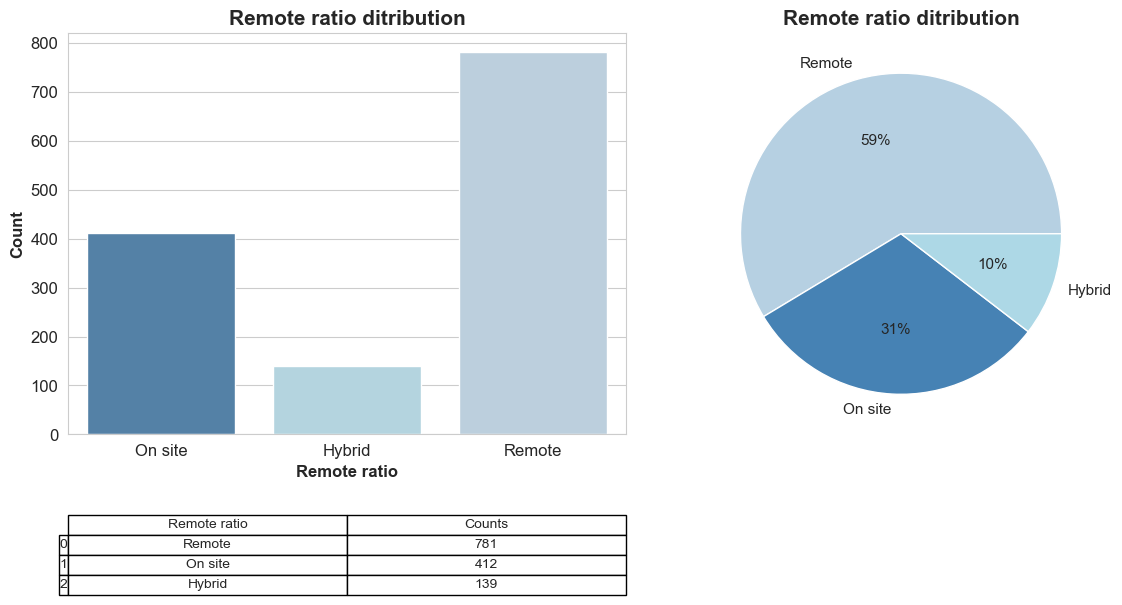

In [408]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(5)
colors=['#4682B4', 'lightblue', '#B6D0E2']
ax=sns.countplot(x ='remote_ratio_text', data = df,order=['On site','Hybrid','Remote'],palette = colors)
plt.title("Remote ratio ditribution",fontsize=15,fontweight='bold')
plt.xlabel('Remote ratio',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=12)

plt.subplot(1, 2, 2)
plt.pie(remote_counts['Counts'],labels=remote_counts['Remote ratio'], colors=['#B6D0E2','#4682B4', 'lightblue'],textprops={"fontsize":11}, autopct='%.0f%%')
plt.title("Remote ratio ditribution",fontsize=15,fontweight='bold')
plt.tight_layout()
table(ax, data=remote_counts, rowLabels=remote_counts['Remote ratio'], colLabels=remote_counts['Counts'],bbox=[0, -0.4, 1, 0.2],cellLoc='center')

plt.show()

#### What is the distribution of employment type?

In [409]:
employ_counts=df['employment_type_text'].value_counts().rename_axis('Employment type').reset_index(name='Counts')
employ_counts

,Employment type,Counts
0,Full-time,1306
1,Part-time,13
2,Contract,8
3,Freelance,5


There are 1306 people working full time, 13 people working part time, 8 people working with a contract and 5 people are freelancers.

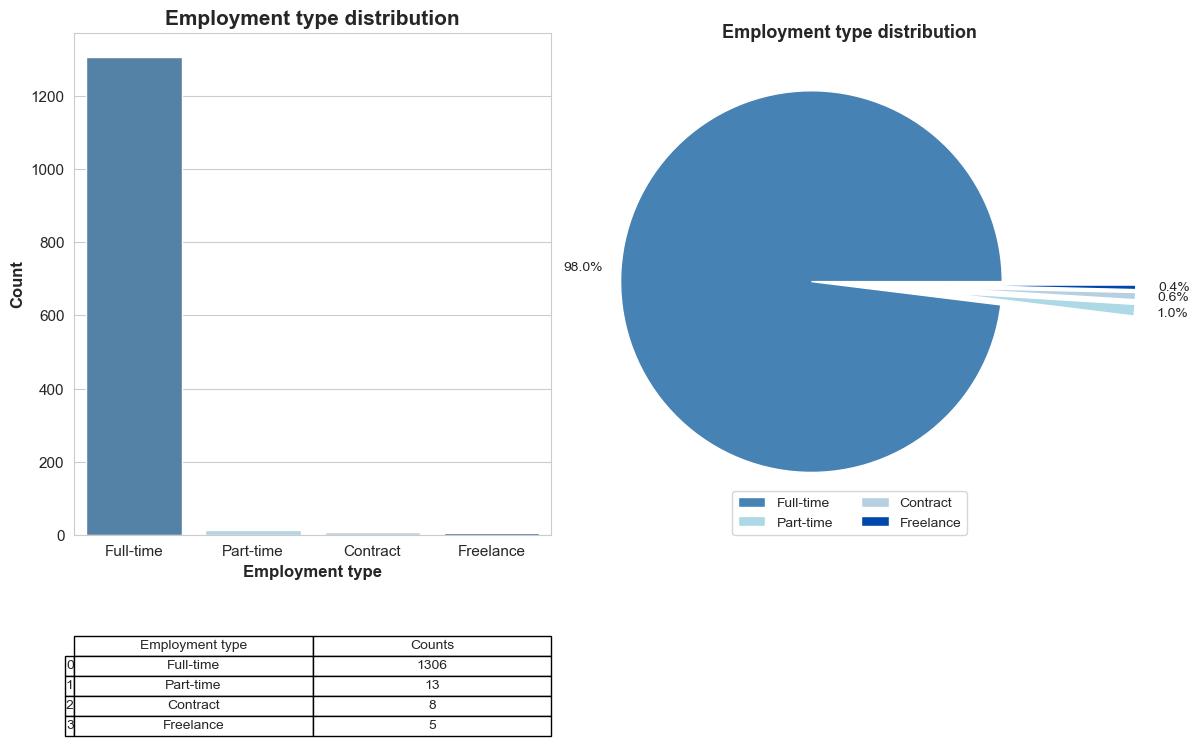

In [410]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(6)
colors=['#4682B4', 'lightblue', '#B6D0E2','#0047AB']
ax=sns.countplot(x ='employment_type_text', data = df,palette = colors)
plt.title("Employment type distribution",fontsize=15,fontweight='bold')
plt.xlabel('Employment type',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)

plt.subplot(1, 2, 2)
#palette_color = sns.color_palette("bright")
palette_color =['#4682B4', 'lightblue', '#B6D0E2','#0047AB']
explode = [0.2, 0.5, 0.5, 0.5]

plt.pie(employ_counts['Counts'],colors=palette_color,autopct='%.1f%%',pctdistance=1.2,explode=explode)
plt.legend(labels=employ_counts['Employment type'], loc='upper center', 
            bbox_to_anchor=(0.5, 0.08),ncol=2)
plt.title("Employment type distribution",fontsize=13,fontweight='bold')
plt.tight_layout()
table(ax, data=employ_counts, rowLabels=employ_counts['Employment type'], colLabels=employ_counts['Counts'],bbox=[0, -0.4, 1, 0.2],cellLoc='center')

plt.show()

#### What is the distribution of company locations?

In [411]:
df['company_location'].value_counts().rename_axis('Company location').reset_index(name='Counts').head(10)

,Company location,Counts
0,US,939
1,GB,87
2,CA,39
3,IN,36
4,DE,35
5,ES,28
6,FR,20
7,BR,14
8,GR,13
9,NL,9


As we notice, most people in the dataset, are working for US companies.

#### What is the distribution of job titles?

In [412]:
df['job_title'].value_counts().rename_axis('Job title').reset_index(name='Counts')

,Job title,Counts
0,Data Scientist,344
1,Data Engineer,320
2,Data Analyst,190
3,Machine Learning Engineer,86
4,Analytics Engineer,43
...,...,...
59,Principal Data Architect,1
60,Product Data Scientist,1
61,Power BI Developer,1
62,Data Science Lead,1


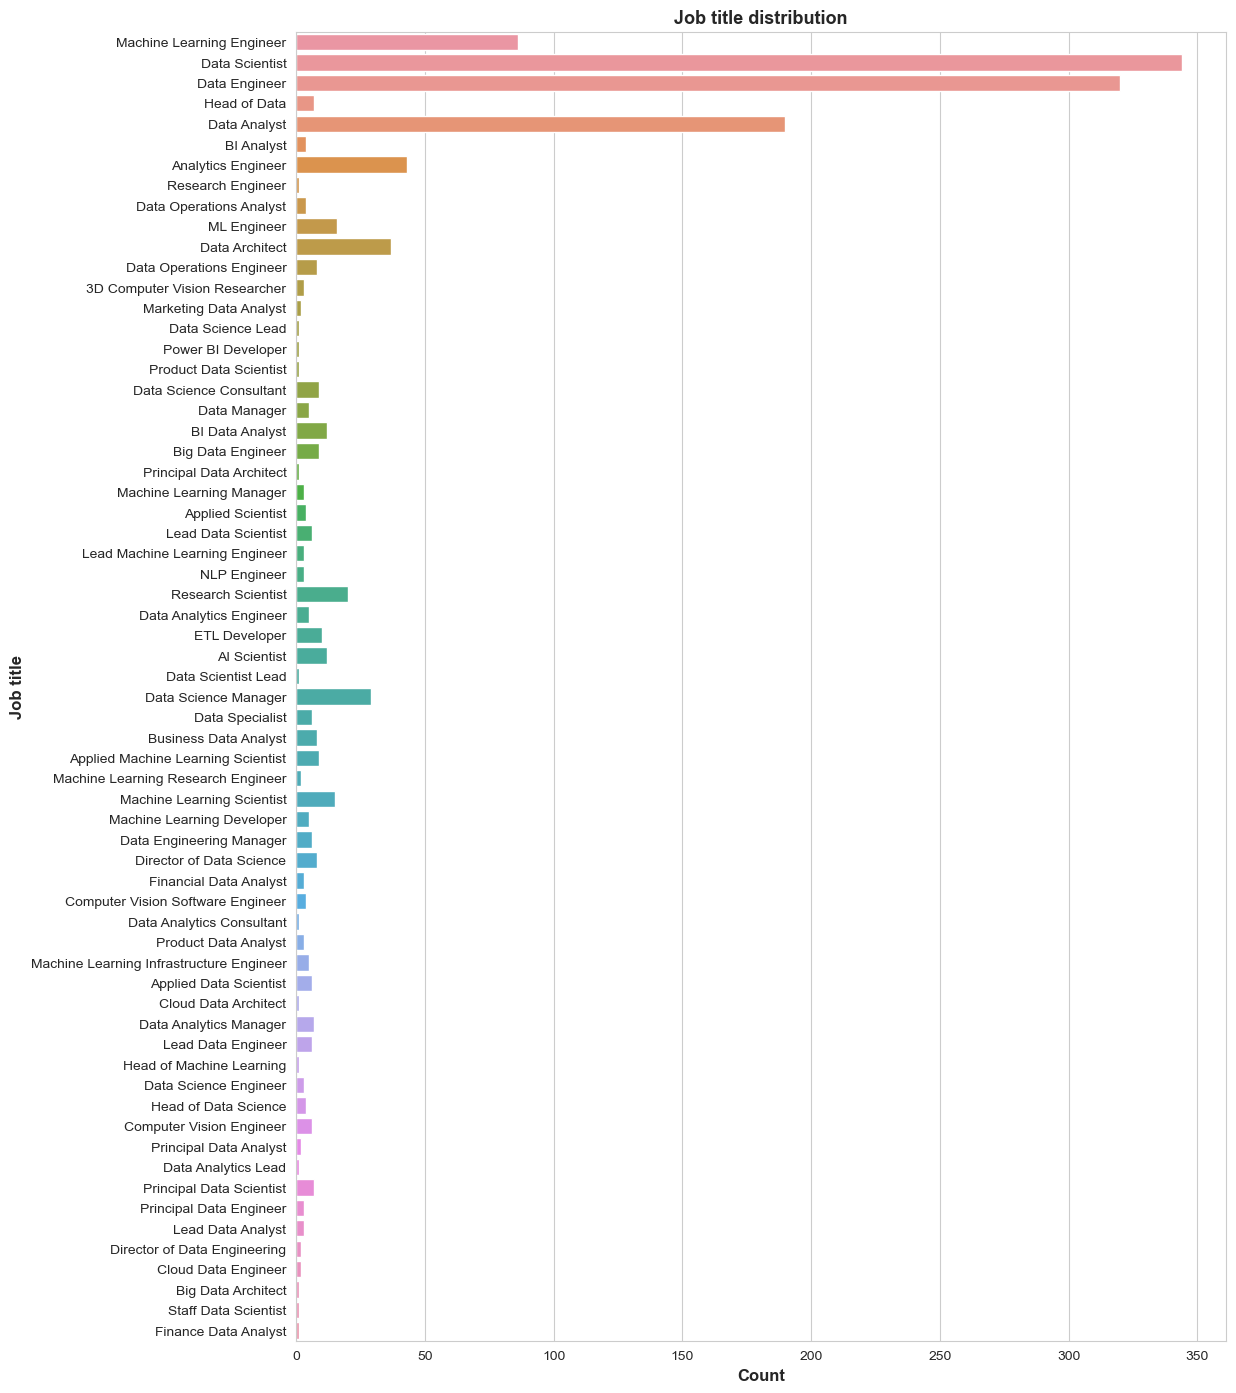

In [413]:
fig, ax = plt.subplots(figsize=(12,17))
sns.countplot(y='job_title', data = df)
plt.title("Job title distribution",fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.ylabel('Job title',fontsize=12,fontweight='bold')
plt.show()

The top 3 jobs are:
- Data Scientists with 344 employees.
- Data Engineers with 320 employees.
- Data Analysts with 190 employees.

#### What is the distribution of salaries?

In [414]:
#sort data
df_sorted=df.sort_values(by=['salary_in_usd'],ascending=False)
df_sorted.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text
1278,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,Executive-level,Full-time,Remote,Large
1093,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,Mid-level,Full-time,On site,Medium
1150,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L,Mid-level,Full-time,Remote,Large
1324,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,Mid-level,Full-time,Hybrid,Large
1249,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,Executive-level,Contract,Remote,Small


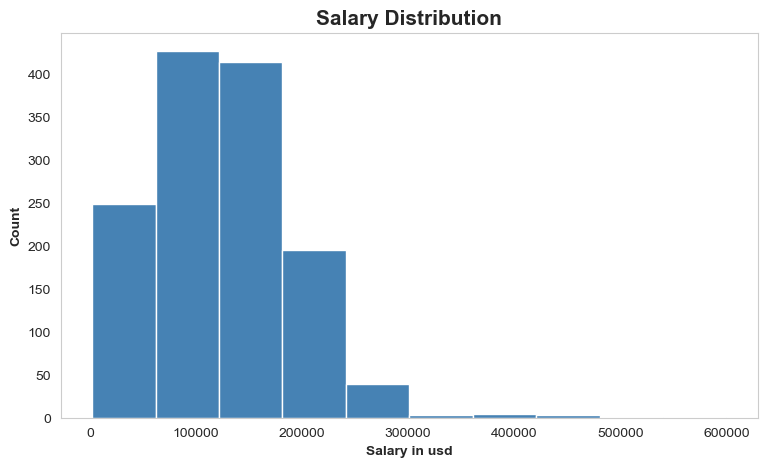

In [415]:
#visualization
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.hist(data=df, x='salary_in_usd',color='#4682B4')
plt.title("Salary Distribution",fontsize=15,fontweight='bold')
plt.xlabel('Salary in usd',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

In [416]:
#Mean salary
df['salary_in_usd'].mean()

123374.6584084084

The analysis have shown that the highest salary is 600.000\\$ USD. The mean salary is 123.374\\$ USD and the lowest is 2.324\\$ USD. However the dataset might contain outliers.

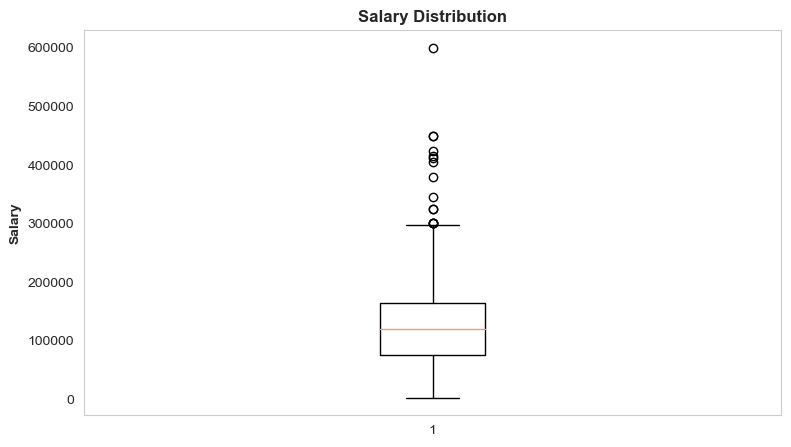

In [417]:
#check for outliers
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.boxplot(df['salary_in_usd'])
plt.title("Salary Distribution",fontweight='bold')
plt.ylabel('Salary',fontweight='bold')
plt.show()

The boxplot confirms our speculation, that the dataset has many outliers.

In [418]:
#remove outliers
df_remove=df.copy()

In [419]:
#IQR method to remove outliers 
Q1=df_remove['salary_in_usd'].quantile(0.25)
Q3=df_remove['salary_in_usd'].quantile(0.75)
IQR= Q3-Q1
lower_limit=Q1 - 1.5 * IQR  
upper_limit=Q3 + 1.5 * IQR 

In [420]:
outliers_low=(df_remove['salary_in_usd']<lower_limit)
outliers_up=(df_remove['salary_in_usd']>upper_limit)

In [421]:
#number of outliers
len(df_remove['salary_in_usd'][outliers_low | outliers_up]) 

15

In [422]:
#data without outliers
len(df_remove['salary_in_usd'][~(outliers_low | outliers_up)]) 

1317

In [423]:
df_remove=df_remove[~(outliers_low | outliers_up)]
df_remove.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M,Mid-level,Full-time,On site,Medium
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M,Mid-level,Full-time,On site,Medium
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M,Mid-level,Full-time,Remote,Medium
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M,Mid-level,Full-time,Remote,Medium
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M,Mid-level,Full-time,Remote,Medium


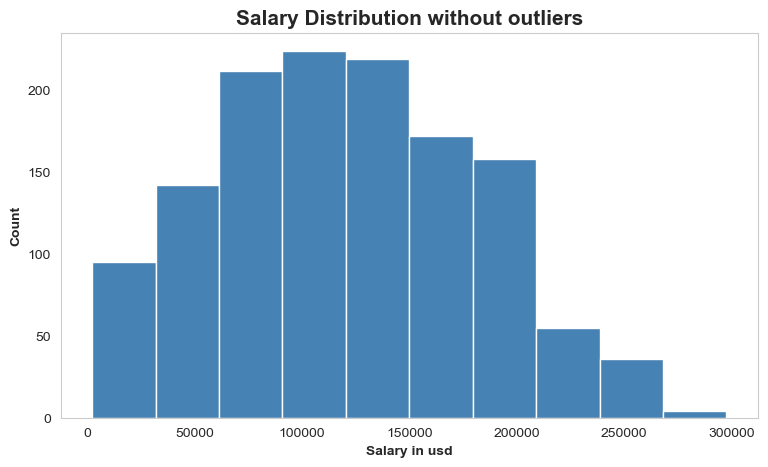

In [424]:
#histogram after the removal
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.hist(data=df_remove, x='salary_in_usd',color='#4682B4')
plt.title("Salary Distribution without outliers",fontsize=15,fontweight='bold')
plt.xlabel('Salary in usd',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

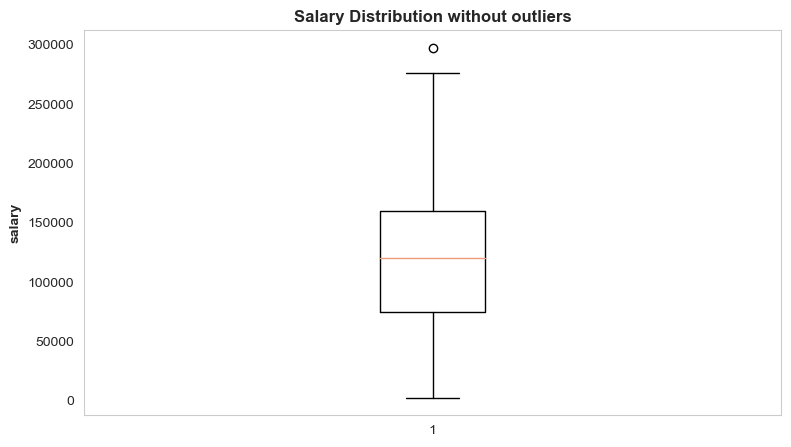

In [425]:
#boxplot after the removal
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.boxplot(df_remove['salary_in_usd'])
plt.title("Salary Distribution without outliers",fontweight='bold')
plt.ylabel('salary',fontweight='bold')
plt.show()

In [426]:
df_sorted_rem=df_remove.sort_values(by=['salary_in_usd'],ascending=False)
df_sorted_rem.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text
399,2022,EX,FT,Data Engineer,297500,USD,297500,US,100,US,M,Executive-level,Full-time,Remote,Medium
1154,2021,SE,FT,Lead Data Engineer,276000,USD,276000,US,0,US,L,Senior-level,Full-time,On site,Large
43,2022,SE,FT,Data Engineer,275000,USD,275000,US,100,US,M,Senior-level,Full-time,Remote,Medium
1109,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L,Mid-level,Contract,Remote,Large
912,2022,SE,FT,Data Architect,266400,USD,266400,US,100,US,M,Senior-level,Full-time,Remote,Medium


After the removal of outliers, the highest salary changed to 297.500\\$ USD. The lowest remained the same at 2.324\\$ USD.

#### What is the mean salary after the removal of outliers?

In [427]:
df_remove['salary_in_usd'].mean()

120428.58390280942

The mean salary changed to 120.428\\$ USD.

#### What is the mean salary for each experience level?

In [428]:
exp_l=df_remove.groupby('experience_level_text')['salary_in_usd'].mean().astype('int64')
exp_l_order=exp_l.reindex(['Entry-level','Mid-level','Senior-level','Executive-level'])
exp_l_order.rename_axis('Experience level').reset_index(name='Mean salary')

,Experience level,Mean salary
0,Entry-level,60133
1,Mid-level,87138
2,Senior-level,142861
3,Executive-level,172824


- Entry level employees have a mean salary of 60.133\\$ USD. <br>
- MId level employees have a mean salary of 87.138\\$ USD. <br>
- Senior level employees have a mean salary of 142.861\\$ USD. <br>
- Executive level employees have a mean salary of 172.824\\$ USD.

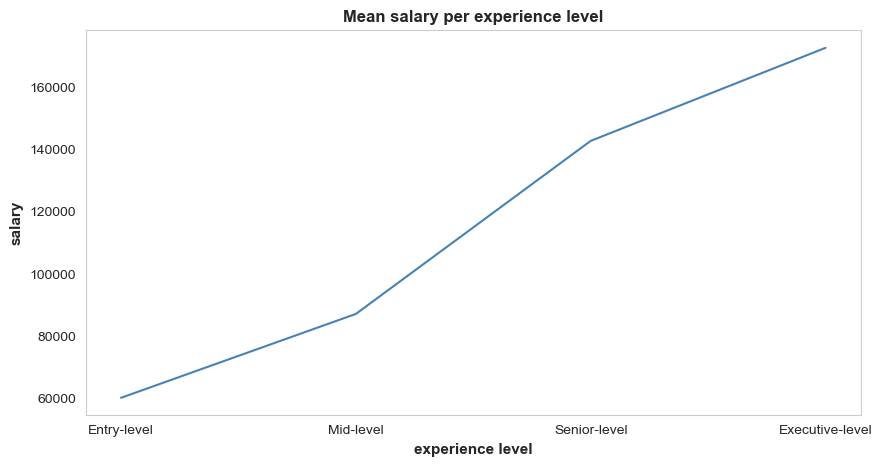

In [429]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid(False)
plt.plot(exp_l_order,color='#4682B4')
plt.title("Mean salary per experience level",fontweight='bold')
plt.xlabel('experience level',fontsize=11,fontweight='bold')
plt.ylabel('salary',fontsize=11,fontweight='bold')

plt.show()

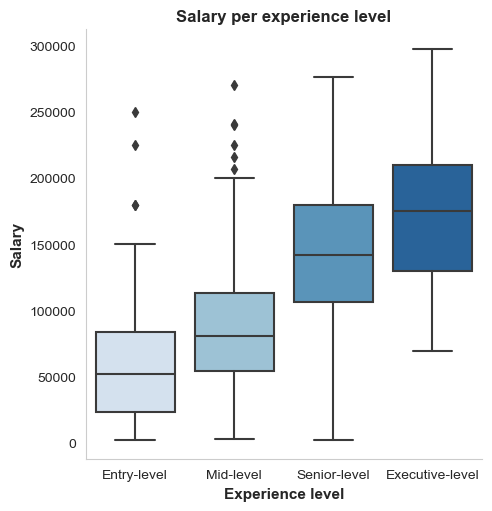

In [430]:
sns.catplot(x='experience_level_text',y='salary_in_usd',data=df_remove,kind='box',order=['Entry-level','Mid-level','Senior-level','Executive-level'],palette = 'Blues')
plt.title("Salary per experience level",fontweight='bold')
plt.xlabel('Experience level',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

The salary development appears to be associated with the experience level. The higher the experience level the higher the mean salary.

#### Is there an association between salary and remote ratio?

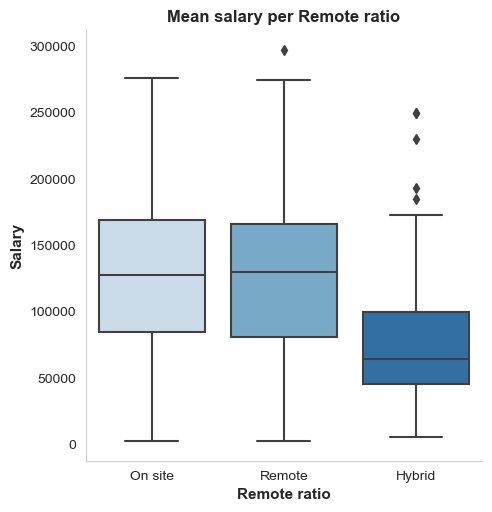

In [431]:
sns.catplot(x='remote_ratio_text',y='salary_in_usd',data=df_remove,kind='box',palette = 'Blues')
plt.title("Mean salary per Remote ratio",fontweight='bold')
plt.xlabel('Remote ratio',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

Remote ratio does not affect the salaries much, except hybrid ones. Remote and on site jobs have almost the same distribution in salaries. But they have a greater difference compared to the hybrid ones.


#### what is the association between salary and company size?


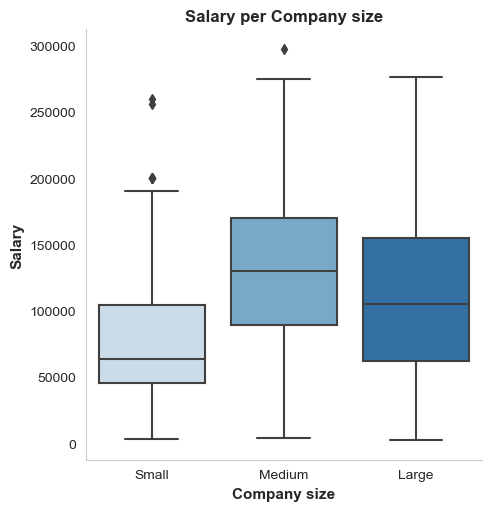

In [432]:
sns.catplot(x='company_size_text',y='salary_in_usd',data=df_remove,kind='box',order=['Small','Medium','Large'],palette = 'Blues')
plt.title("Salary per Company size",fontweight='bold')
plt.xlabel('Company size',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

Medium sized companies have better salaries compared to larger and smaller ones.

#### what is the association between salary and Employment type?

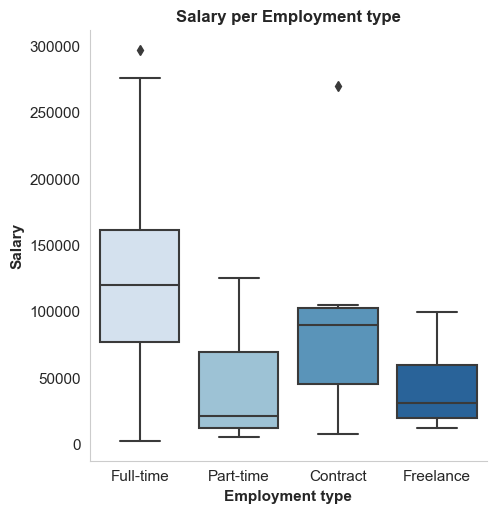

In [433]:
sns.catplot(x='employment_type_text',y='salary_in_usd',data=df_remove,kind='box',palette = 'Blues')
plt.title("Salary per Employment type",fontweight='bold')
plt.xlabel('Employment type',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.grid(False)

Full time positions have better salaries compared to the other types. Followed by contract, part time and freelance positions.

#### What is the mean salary per job title?

In [434]:
df_remove.groupby('job_title')['salary_in_usd'].mean().astype('int64').sort_values(ascending=False).rename_axis('Job title').reset_index(name='Mean salary')

,Job title,Mean salary
0,Cloud Data Architect,250000
1,Research Engineer,240000
2,Principal Data Engineer,192500
3,Data Scientist Lead,183000
4,Principal Data Scientist,180641
...,...,...
58,NLP Engineer,33706
59,Machine Learning Research Engineer,16085
60,Product Data Scientist,8000
61,Power BI Developer,5409


Cloud Data Architects have the highest mean salary. They are followed by Research Engineers and Principal Data Engineers.

#### What is the mean salary for each job title in every experience level?

In [435]:
df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64').rename_axis(['Job title','Experience level']).reset_index(name='Mean salary')


,Job title,Experience level,Mean salary
0,3D Computer Vision Researcher,Entry-level,2324
1,3D Computer Vision Researcher,Mid-level,5409
2,3D Computer Vision Researcher,Senior-level,5000
3,AI Scientist,Entry-level,24659
4,AI Scientist,Executive-level,200000
...,...,...,...
128,Research Scientist,Entry-level,86132
129,Research Scientist,Executive-level,84229
130,Research Scientist,Mid-level,95370
131,Research Scientist,Senior-level,88072


#### what is the mean salary of Data Analysts and Data Engineers?

In [436]:
data_an=df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64'). reset_index()
d_anl=data_an[data_an['job_title']=="Data Analyst"]
df_sort_an=d_anl.sort_values('experience_level_text'
                         , key=lambda col: col.map(
                                 { 'Entry-level':1
                                  ,'Mid-level':2
                                  ,'Senior-level':3
                                  ,'Executive-level':4}))

df_sort_an.columns = df_sort_an.columns.str.replace('job_title', 'Job title')
df_sort_an.columns = df_sort_an.columns.str.replace('experience_level_text', 'Experience level')
df_sort_an.columns = df_sort_an.columns.str.replace('salary_in_usd', 'Mean salary')
df_sort_an

,Job title,Experience level,Mean salary
38,Data Analyst,Entry-level,51217
40,Data Analyst,Mid-level,82198
41,Data Analyst,Senior-level,111948
39,Data Analyst,Executive-level,120000


In [437]:
data_en=df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64'). reset_index()
d_eng=data_en[data_en['job_title']=="Data Engineer"]
df_sort_eng=d_eng.sort_values('experience_level_text'
                         , key=lambda col: col.map(
                               { 'Entry-level':1
                                  ,'Mid-level':2
                                  ,'Senior-level':3
                                  ,'Executive-level':4}))
df_sort_eng.columns = df_sort_eng.columns.str.replace('job_title', 'Job title')
df_sort_eng.columns = df_sort_eng.columns.str.replace('experience_level_text', 'Experience level')
df_sort_eng.columns = df_sort_eng.columns.str.replace('salary_in_usd', 'Mean salary')                                
df_sort_eng

,Job title,Experience level,Mean salary
49,Data Engineer,Entry-level,58916
51,Data Engineer,Mid-level,83630
52,Data Engineer,Senior-level,147340
50,Data Engineer,Executive-level,216971


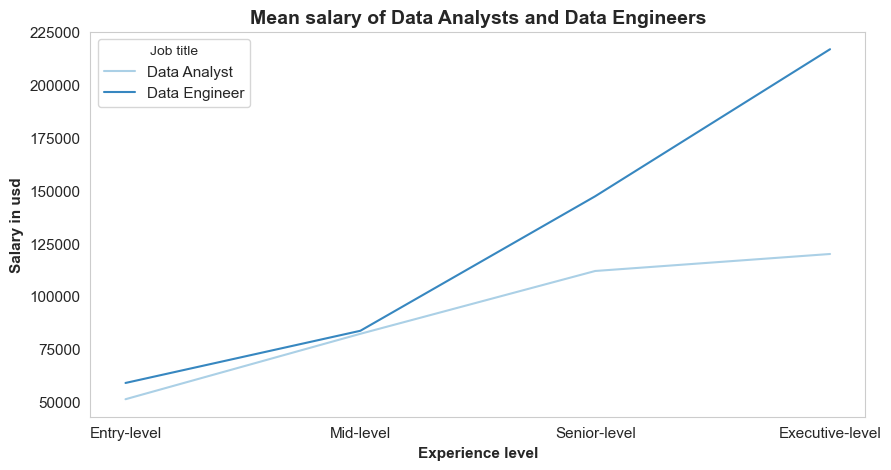

In [438]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid(False)
dfgh = pd.concat([df_sort_an, df_sort_eng]).reset_index(drop=True)
sns.lineplot(x='Experience level',y='Mean salary',data=dfgh,hue='Job title',palette = 'Blues')
plt.title('Mean salary of Data Analysts and Data Engineers',fontsize=14,fontweight='bold')
plt.xlabel('Experience level',fontsize=11,fontweight='bold')
plt.ylabel('Salary in usd',fontsize=11,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.legend(title='Job title', fontsize=11)

As we observe Data engineers have better salary development compared to Data analysts.

#### what is the distribution of the remote ratio, each year, for every experience level?

In [439]:
df_remote=df_remove.groupby(['remote_ratio_text','work_year','experience_level_text']).size().rename_axis(['Remote ratio','Work Year','Experience level']).reset_index(name='Counts')
df_remote.sort_values(by='Counts',ascending=False)

,Remote ratio,Work Year,Experience level,Counts
33,Remote,2022,Senior-level,433
22,On site,2022,Senior-level,265
32,Remote,2022,Mid-level,121
21,On site,2022,Mid-level,75
28,Remote,2021,Mid-level,45
30,Remote,2022,Entry-level,42
29,Remote,2021,Senior-level,42
6,Hybrid,2021,Mid-level,29
26,Remote,2021,Entry-level,27
31,Remote,2022,Executive-level,21


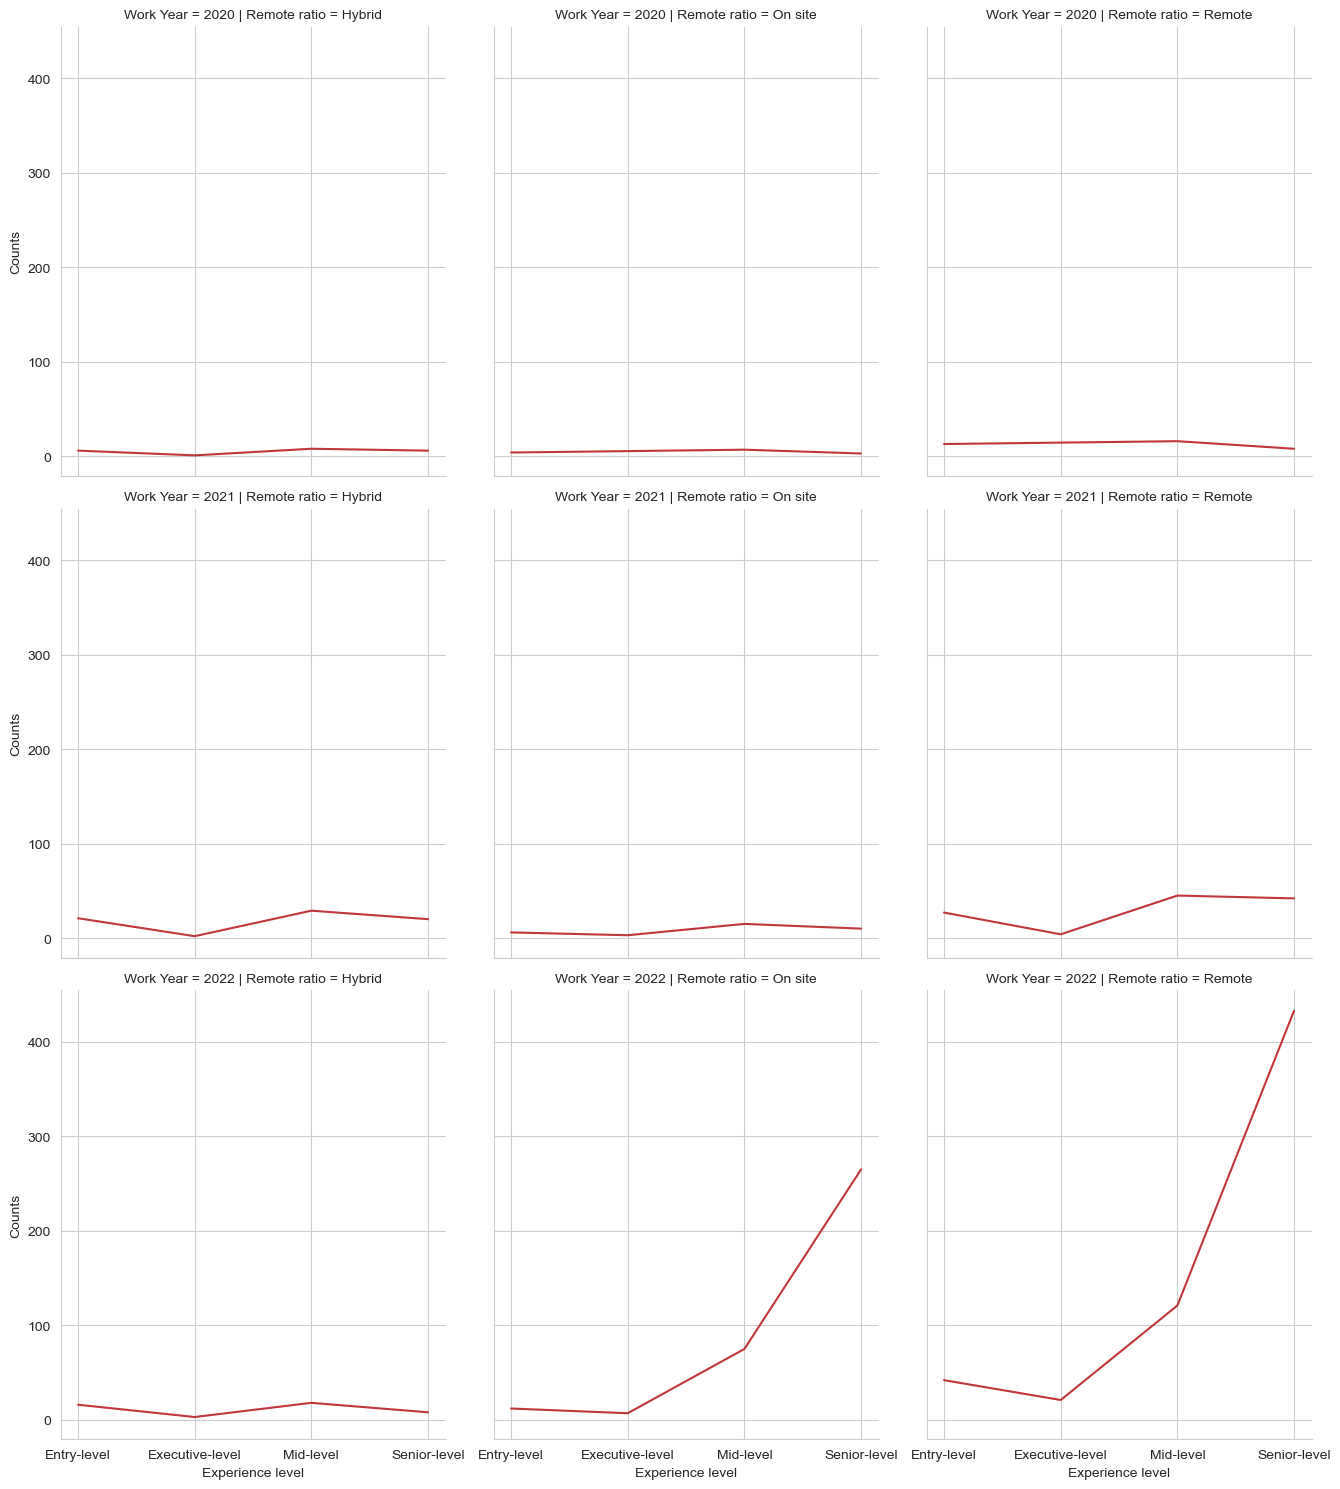

In [440]:
sns.set_palette("RdBu")
sns.relplot(x='Experience level',y='Counts',data=df_remote,kind='line',col='Remote ratio',row='Work Year',aspect=0.9)
plt.show()

As we notice, most seniors are working remotely in 2022. Followed by seniors that are working on site and mid-levels working remotely.

#### What is the mean salary of data related jobs in every country?

In [441]:
#ATTENTION:the code below takes some time to run
#convert country codes in country names (code for country converter: conda install country_converter)
df_remove['country_code'] = df_remove['company_location'].apply(coco.convert)  #convert Alpha-2 codes to Alpha-3 codes
df_remove['country_name'] = df_remove['company_location'].apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
df_remove.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text,country_code,country_name
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States


In [442]:
country_mean=df_remove.groupby(['country_name','country_code'])['salary_in_usd'].mean().astype('int64').rename_axis(['Country name','Country code']).reset_index(name='Mean salary')
country_mean.sort_values(by='Mean salary',ascending=False)

,Country name,Country code,Mean salary
45,Puerto Rico,PRI,167500
47,Russia,RUS,157500
57,United States,USA,142938
39,New Zealand,NZL,125000
29,Israel,ISR,119059
31,Japan,JPN,114127
9,Canada,CAN,108282
1,Algeria,DZA,100000
27,Iraq,IRQ,100000
55,United Arab Emirates,ARE,100000


In [443]:
#visualize world map (plotly code: conda install -c plotly plotly) 
fig = px.choropleth(country_mean, locations="Country code",
                    color="Mean salary", 
                    hover_name="Country name", #hover information
                    color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary per country ')
fig.show()

The country with the highest mean salary is Puerto Rico, followed by Russia and United States.

In [444]:
#records per country 
df_remove['country_name'].value_counts().rename_axis('Country').reset_index(name='Number of records')

,Country,Number of records
0,United States,924
1,United Kingdom,87
2,Canada,39
3,India,36
4,Germany,35
5,Spain,28
6,France,20
7,Brazil,14
8,Greece,13
9,Netherlands,9


As we notice, some countries have only one record.

In [445]:
#remove countries with only one record
keep_dupes=df_remove[df_remove.duplicated(subset='country_name', keep=False)] #keep=false means that all duplicates are True
keep_dupes.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text,country_code,country_name
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States


In [446]:
keep_dupes['country_name'].value_counts().rename_axis('Country').reset_index(name='Number of records')

,Country,Number of records
0,United States,924
1,United Kingdom,87
2,Canada,39
3,India,36
4,Germany,35
5,Spain,28
6,France,20
7,Brazil,14
8,Greece,13
9,Australia,9


In [447]:
countries_mean_dup=keep_dupes.groupby(['country_name','country_code'])['salary_in_usd'].mean().astype('int64').rename_axis(['Country name','Country code']).reset_index(name='Mean salary')
countries_mean_dup.sort_values(by='Mean salary',ascending=False)

,Country name,Country code,Mean salary
23,Puerto Rico,PRI,167500
24,Russia,RUS,157500
32,United States,USA,142938
15,Japan,JPN,114127
5,Canada,CAN,108282
30,United Arab Emirates,ARE,100000
19,Nigeria,NGA,86666
1,Australia,AUS,83675
31,United Kingdom,GBR,82696
10,Germany,DEU,79646


In [448]:
#visualization
fig = px.choropleth(countries_mean_dup, locations="Country code",
                    color="Mean salary", 
                    hover_name="Country name", #hover information
                    color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary per country excluding the countries with only one record')
fig.show()

#### What is the mean salary in every european country?

In [449]:
#convert country to continent (code: pip install pycountry-convert) 
df_remove['continent_code'] = [pc.country_alpha2_to_continent_code(x) 
                                                                    for x in df_remove['company_location']]
df_remove['continent_name'] = [pc.convert_continent_code_to_continent_name(x) 
                                                                    for x in df_remove['continent_code']]
df_remove.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_text,employment_type_text,remote_ratio_text,company_size_text,country_code,country_name,continent_code,continent_name
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States,NA,North America
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M,Mid-level,Full-time,On site,Medium,USA,United States,NA,North America
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States,NA,North America
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States,NA,North America
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M,Mid-level,Full-time,Remote,Medium,USA,United States,NA,North America


In [450]:
european=df_remove[df_remove['continent_name']=='Europe']
european.groupby(['country_name'])['salary_in_usd'].mean().astype('int64').rename_axis('Country').reset_index(name='Mean salary').sort_values(by='Mean salary',ascending=False)

,Country,Mean salary
21,Russia,157500
26,United Kingdom,82696
9,Germany,79646
2,Belgium,76936
17,Netherlands,70570
12,Ireland,68436
1,Austria,67790
18,Poland,65605
22,Slovenia,63831
7,Finland,63172


In [451]:
#visualize european map 
fig = px.choropleth(country_mean,locations='Country code', color='Mean salary',hover_name="Country name", scope="europe",color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary in European countries')
fig.show()

In [452]:
fig = px.choropleth(countries_mean_dup,locations='Country code', color='Mean salary',hover_name="Country name", scope="europe",color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary in European countries excluding the countries with only one record')
fig.show()

The European country with the highest mean salary is Russia, followed by UK and Germany.

#### What is the mean salary of data related jobs in Germany, in every experience level?

In [453]:
eur=european.groupby(['country_name','experience_level_text','remote_ratio_text'])['salary_in_usd'].mean().astype('int64').reset_index()
eur.columns = eur.columns.str.replace('country_name', 'Country')
eur.columns = eur.columns.str.replace('experience_level_text', 'Experience level')
eur.columns = eur.columns.str.replace('remote_ratio_text', 'Remote ratio')
eur.columns = eur.columns.str.replace('salary_in_usd', 'Mean salary')
eur

,Country,Experience level,Remote ratio,Mean salary
0,Albania,Entry-level,On site,2324
1,Austria,Entry-level,Hybrid,50000
2,Austria,Mid-level,Hybrid,67798
3,Austria,Mid-level,On site,62119
4,Austria,Senior-level,On site,91237
...,...,...,...,...
79,United Kingdom,Mid-level,On site,88246
80,United Kingdom,Mid-level,Remote,80429
81,United Kingdom,Senior-level,Hybrid,86008
82,United Kingdom,Senior-level,On site,86543


In [454]:
eur_germany=eur[eur['Country']=='Germany']
eur_germany.loc[eur_germany.duplicated(subset='Country'), 'Country'] = '' # display country name once
eur_germany

,Country,Experience level,Remote ratio,Mean salary
24,Germany,Entry-level,Hybrid,53278
25,,Entry-level,On site,63050
26,,Entry-level,Remote,57626
27,,Executive-level,Hybrid,130026
28,,Executive-level,On site,141846
29,,Mid-level,Hybrid,77713
30,,Mid-level,On site,96802
31,,Mid-level,Remote,59412
32,,Senior-level,Hybrid,79197
33,,Senior-level,On site,84229


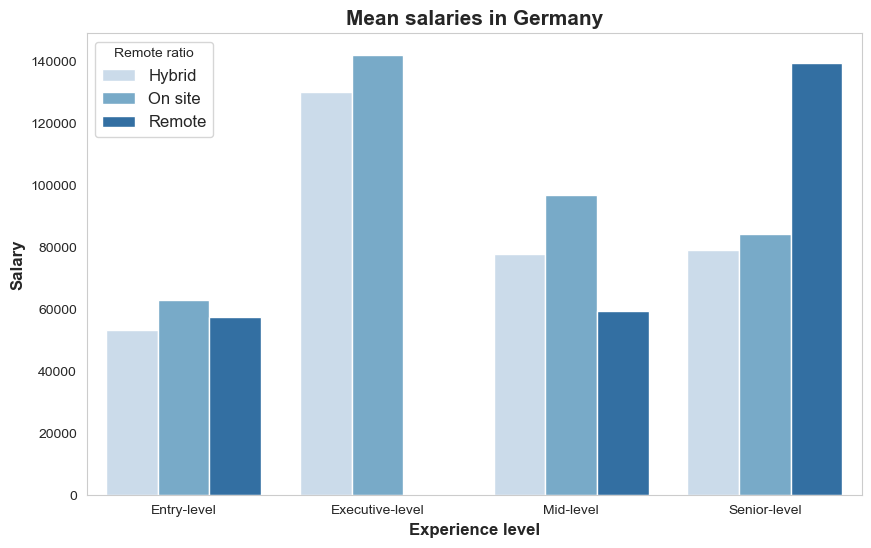

In [455]:
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(False)
sns.barplot(x='Experience level',y='Mean salary',data=eur_germany,hue='Remote ratio',palette = 'Blues')
plt.title('Mean salaries in Germany',fontsize=15,fontweight='bold')
plt.xlabel('Experience level',fontsize=12,fontweight='bold')
plt.ylabel('Salary',fontsize=12,fontweight='bold')
plt.legend(title='Remote ratio', fontsize=12)

Executive level employees, working on site, have the highest salaries. Followed by senior level employees working remotely. 

#### what is the mean salary of junior data analysts and junior data engineers in every country?

In [456]:
data_an=df_remove.groupby(['job_title','experience_level_text','country_name'])['salary_in_usd'].mean().astype('int64').reset_index(name='Mean salary') 
data_an.columns = data_an.columns.str.replace('job_title', 'Job title')
data_an.columns = data_an.columns.str.replace('experience_level_text', 'Experience level')
data_an.columns = data_an.columns.str.replace('country_name', 'Country')
data_an

,Job title,Experience level,Country,Mean salary
0,3D Computer Vision Researcher,Entry-level,Albania,2324
1,3D Computer Vision Researcher,Mid-level,India,5409
2,3D Computer Vision Researcher,Senior-level,United States,5000
3,AI Scientist,Entry-level,American Samoa,18053
4,AI Scientist,Entry-level,Denmark,45896
...,...,...,...,...
318,Research Scientist,Senior-level,Canada,96113
319,Research Scientist,Senior-level,France,89494
320,Research Scientist,Senior-level,Portugal,60757
321,Research Scientist,Senior-level,United States,97000


In [457]:
data_an_con=data_an[(data_an['Job title'] == 'Data Analyst') & (data_an['Experience level'] == 'Entry-level')]
data_an_con

,Job title,Experience level,Country,Mean salary
68,Data Analyst,Entry-level,Argentina,50000
69,Data Analyst,Entry-level,Australia,42028
70,Data Analyst,Entry-level,Brazil,7828
71,Data Analyst,Entry-level,Canada,59500
72,Data Analyst,Entry-level,France,43764
73,Data Analyst,Entry-level,India,6242
74,Data Analyst,Entry-level,Indonesia,15000
75,Data Analyst,Entry-level,Nigeria,10000
76,Data Analyst,Entry-level,Portugal,22809
77,Data Analyst,Entry-level,Spain,10354


In [458]:
data_en_con=data_an[(data_an['Job title'] == 'Data Engineer') & (data_an['Experience level'] == 'Entry-level')]
data_en_con

,Job title,Experience level,Country,Mean salary
104,Data Engineer,Entry-level,Germany,58448
105,Data Engineer,Entry-level,India,19762
106,Data Engineer,Entry-level,Japan,41689
107,Data Engineer,Entry-level,United Kingdom,49950
108,Data Engineer,Entry-level,United States,90357


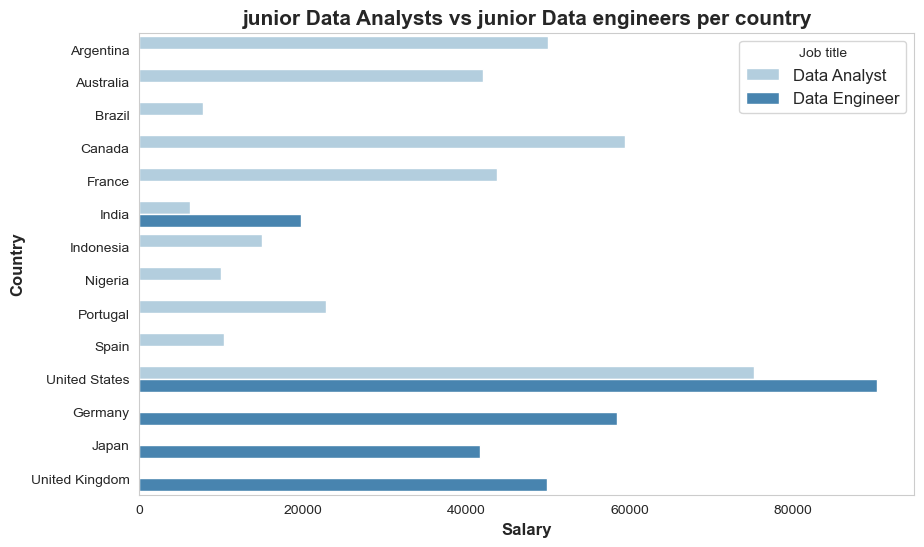

In [459]:
#visualization
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(False)
data_eng_an=pd.concat([data_an_con,data_en_con]).reset_index(drop=True)
sns.barplot(x='Mean salary',y='Country',data=data_eng_an,hue='Job title',palette = 'Blues')
plt.title('junior Data Analysts vs junior Data engineers per country',fontsize=15,fontweight='bold')
plt.xlabel('Salary',fontsize=12,fontweight='bold')
plt.ylabel('Country',fontsize=12,fontweight='bold')
plt.legend(title='Job title', fontsize=12)

Data Engineers have relatively higher salaries compared to Data analysts.